# Data Preparation

### 1. Load the Data from Google Sheets

In [19]:
# Import python library gspread to read the Google Sheet
import gspread

# Import gspread dataframe to get the data as a dataframe
import gspread_dataframe
from gspread_dataframe import get_as_dataframe

# Import pandas to extract the data
import pandas as pd

# Import numpy to manipulate the data
import numpy as np

In [20]:
# Use the service_account method to give service account details to gspread
sa = gspread.service_account(filename="extended-pagoda-419111-6c5d3c5c6b77.json")

# Use the sa gspread client to connect to the Google Sheet
sheet = sa.open("2024: Body Composition Tracking")

# Use the worksheet method to define worksheet to read
worksheet = sheet.worksheet("Weighings")

# Use the get_as_dataframe method to get the data as a dataframe
# Specify that the first column in the data should be used as the index, includes dates and is formatted day first
df = get_as_dataframe(worksheet, index_col=0, parse_dates=True, dayfirst=True)

# Review the first 5 rows of the dataframe
df.head()

,TIME,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,SUB FAT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
DATE,,,,,,,,,,,,,,
2023-11-01,07:03,167.4,24.8,0.241,127.1,0.162,9.5,0.520,0.522,119.0,6.5,0.199,1619.0,38.0
2023-11-02,07:03,166.2,24.6,0.238,126.6,0.16,9.4,0.522,0.524,118.6,6.6,0.200,1614.0,38.0
2023-11-09,07:04,166.4,24.6,0.239,126.6,0.161,9.4,0.521,0.523,118.6,6.6,0.200,1615.0,38.0
2023-11-16,07:04,166.6,24.7,0.240,126.6,0.161,9.5,0.521,0.522,118.6,6.5,0.200,1616.0,38.0
2023-11-23,07:03,165.8,24.6,0.238,126.3,0.16,9.4,0.522,0.524,118.5,6.6,0.201,1611.0,38.0


### 2. Understand the Data

In [21]:
# Review the DatetimeIndex
df.index

# Note the NaT (Not a Time) values

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-09', '2023-11-16',
               '2023-11-23', '2023-11-30', '2023-12-01', '2023-12-02',
               '2023-12-03', '2023-12-04',
               ...
               '2024-06-01',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='DATE', length=199, freq=None)

In [22]:
# Review the dimensions of the dataset
df.shape

(199, 14)

In [23]:
# Review the columns of the dataset
df.columns

Index(['TIME', 'WEIGHT', 'BMI', 'BODY FAT', 'FAT-FREE BODY WEIGHT', 'SUB FAT',
       'VIS FAT', 'BODY WATER', 'SKE MUSCLE', 'MUSCLE MASS', 'BONE MASS',
       'PROTEIN', 'BMR', 'AGE'],
      dtype='object')

In [24]:
# Review the data types for each column
df.dtypes

# Note that the SUB FAT column is an object data type

TIME                     object
WEIGHT                  float64
BMI                     float64
BODY FAT                float64
FAT-FREE BODY WEIGHT    float64
SUB FAT                  object
VIS FAT                 float64
BODY WATER              float64
SKE MUSCLE              float64
MUSCLE MASS             float64
BONE MASS               float64
PROTEIN                 float64
BMR                     float64
AGE                     float64
dtype: object

In [25]:
# Review basis statistics for all continous variables
df.describe()

,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,162.338583,24.045669,0.228976,125.155906,9.002362,0.527063,0.530000,117.293701,6.472441,0.203890,1591.842520,37.984252
std,2.077317,0.311870,0.005131,0.769627,0.208344,0.002847,0.003528,0.725253,0.065073,0.001993,11.754381,0.177471
min,158.800000,23.500000,0.220000,123.900000,8.600000,0.520000,0.522000,116.000000,6.400000,0.199000,1571.000000,36.000000
25%,160.700000,23.800000,0.225000,124.500000,8.800000,0.525000,0.527000,116.700000,6.400000,0.202000,1582.000000,38.000000
50%,162.200000,24.000000,0.229000,125.100000,9.000000,0.527000,0.530000,117.200000,6.500000,0.204000,1592.000000,38.000000
75%,163.800000,24.300000,0.233000,125.750000,9.200000,0.529000,0.533000,117.800000,6.500000,0.205000,1600.000000,38.000000
max,167.400000,24.800000,0.241000,127.100000,9.500000,0.532000,0.536000,119.000000,6.600000,0.207000,1619.000000,38.000000


In [26]:
# Review the last 5 rows of the dataset

# Note the NaT and NaN (Not a Number) values
df.tail()

,TIME,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,SUB FAT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
DATE,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Clean the Data

In [27]:
# Look for missing values
df.isnull().sum()

# Note that each column has the same amount of missing values apart from the SUB FAT column

TIME                    72
WEIGHT                  72
BMI                     72
BODY FAT                72
FAT-FREE BODY WEIGHT    72
SUB FAT                 71
VIS FAT                 72
BODY WATER              72
SKE MUSCLE              72
MUSCLE MASS             72
BONE MASS               72
PROTEIN                 72
BMR                     72
AGE                     72
dtype: int64

In [28]:
# Find location of null values

In [29]:
# As we don't have the data for the empty strings, we will replace them with NaN
df = df.replace(r'^s*$', np.nan, regex=True)

In [30]:
# Drop rows that contain NaN
df = df.dropna()

# Review updated last 5 rows
df.tail()

,TIME,WEIGHT,BMI,BODY FAT,FAT-FREE BODY WEIGHT,SUB FAT,VIS FAT,BODY WATER,SKE MUSCLE,MUSCLE MASS,BONE MASS,PROTEIN,BMR,AGE
DATE,,,,,,,,,,,,,,
2024-03-31,09:47,160.8,23.8,0.226,124.5,0.152,8.9,0.529,0.532,116.7,6.4,0.205,1583.0,38.0
2024-04-01,07:06,161.2,23.9,0.226,124.8,0.152,8.9,0.529,0.532,117.0,6.4,0.205,1585.0,38.0
2024-04-02,08:27,160.2,23.7,0.224,124.3,0.151,8.8,0.530,0.533,116.4,6.4,0.206,1580.0,38.0
2024-04-03,07:04,160.2,23.7,0.224,124.3,0.151,8.8,0.530,0.534,116.6,6.4,0.206,1580.0,38.0
2024-04-04,07:04,159.6,23.6,0.222,124.2,0.15,8.7,0.531,0.535,116.3,6.5,0.206,1576.0,38.0


In [31]:
# Validate that there are no more remaining NaN values
df.isnull().sum()

TIME                    0
WEIGHT                  0
BMI                     0
BODY FAT                0
FAT-FREE BODY WEIGHT    0
SUB FAT                 0
VIS FAT                 0
BODY WATER              0
SKE MUSCLE              0
MUSCLE MASS             0
BONE MASS               0
PROTEIN                 0
BMR                     0
AGE                     0
dtype: int64

In [32]:
# Review the updated dimensions
print(df.shape)

(127, 14)


In [33]:
# Review the updated data types for each column
df.dtypes

TIME                     object
WEIGHT                  float64
BMI                     float64
BODY FAT                float64
FAT-FREE BODY WEIGHT    float64
SUB FAT                  object
VIS FAT                 float64
BODY WATER              float64
SKE MUSCLE              float64
MUSCLE MASS             float64
BONE MASS               float64
PROTEIN                 float64
BMR                     float64
AGE                     float64
dtype: object

In [34]:
# Make columns easier to work with

# Update column names to be lowercase
df.rename(columns=str.lower, inplace=True)

# Replace spaces in column names with hyphens
df.columns = df.columns.str.replace(' ', '-')

In [35]:
# Convert sub-fat column float data type
df[["sub-fat"]] = df[["sub-fat"]].astype(float)

In [36]:
# Convert bmr and age columns to integers
df[["bmr", "age"]] = df[["bmr", "age"]].astype(int)

In [37]:
# Review the updated data types
df.dtypes

time                     object
weight                  float64
bmi                     float64
body-fat                float64
fat-free-body-weight    float64
sub-fat                 float64
vis-fat                 float64
body-water              float64
ske-muscle              float64
muscle-mass             float64
bone-mass               float64
protein                 float64
bmr                       int64
age                       int64
dtype: object

In [38]:
# Review updated first 5 rows
df.head()

,time,weight,bmi,body-fat,fat-free-body-weight,sub-fat,vis-fat,body-water,ske-muscle,muscle-mass,bone-mass,protein,bmr,age
DATE,,,,,,,,,,,,,,
2023-11-01,07:03,167.4,24.8,0.241,127.1,0.162,9.5,0.520,0.522,119.0,6.5,0.199,1619,38
2023-11-02,07:03,166.2,24.6,0.238,126.6,0.160,9.4,0.522,0.524,118.6,6.6,0.200,1614,38
2023-11-09,07:04,166.4,24.6,0.239,126.6,0.161,9.4,0.521,0.523,118.6,6.6,0.200,1615,38
2023-11-16,07:04,166.6,24.7,0.240,126.6,0.161,9.5,0.521,0.522,118.6,6.5,0.200,1616,38
2023-11-23,07:03,165.8,24.6,0.238,126.3,0.160,9.4,0.522,0.524,118.5,6.6,0.201,1611,38


### 4. Descriptive Statistical analysis

In [39]:
# Review updated basis statistics for all continous variables
df.describe()

,weight,bmi,body-fat,fat-free-body-weight,sub-fat,vis-fat,body-water,ske-muscle,muscle-mass,bone-mass,protein,bmr,age
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,162.338583,24.045669,0.228976,125.155906,0.154386,9.002362,0.527063,0.530000,117.293701,6.472441,0.203890,1591.842520,37.984252
std,2.077317,0.311870,0.005131,0.769627,0.003242,0.208344,0.002847,0.003528,0.725253,0.065073,0.001993,11.754381,0.177471
min,158.800000,23.500000,0.220000,123.900000,0.149000,8.600000,0.520000,0.522000,116.000000,6.400000,0.199000,1571.000000,36.000000
25%,160.700000,23.800000,0.225000,124.500000,0.152000,8.800000,0.525000,0.527000,116.700000,6.400000,0.202000,1582.000000,38.000000
50%,162.200000,24.000000,0.229000,125.100000,0.154000,9.000000,0.527000,0.530000,117.200000,6.500000,0.204000,1592.000000,38.000000
75%,163.800000,24.300000,0.233000,125.750000,0.157000,9.200000,0.529000,0.533000,117.800000,6.500000,0.205000,1600.000000,38.000000
max,167.400000,24.800000,0.241000,127.100000,0.162000,9.500000,0.532000,0.536000,119.000000,6.600000,0.207000,1619.000000,38.000000


In [40]:
# Review basic statistics for object variables
df.describe(include=['object'])

,time
count,127
unique,30
top,07:04
freq,47


#### Value counts

In [41]:
# Review count of weight column values
df['weight'].value_counts()

163.6    7
161.2    6
159.4    6
163.4    6
161.8    5
160.4    5
160.8    5
162.6    5
161.0    5
160.2    5
162.2    5
164.0    5
163.8    4
164.2    4
161.4    4
161.6    4
160.0    4
159.2    4
163.2    4
164.6    3
164.4    3
165.8    3
162.4    3
165.2    3
160.6    2
165.6    2
159.8    2
159.6    2
166.4    2
159.0    1
167.4    1
162.8    1
166.2    1
165.4    1
166.8    1
165.0    1
166.6    1
158.8    1
Name: weight, dtype: int64

In [42]:
# Create dataframe using weight columns
df_weight = df[['weight']]
df_weight

,weight
DATE,
2023-11-01,167.4
2023-11-02,166.2
2023-11-09,166.4
2023-11-16,166.6
2023-11-23,165.8
...,...
2024-03-31,160.8
2024-04-01,161.2
2024-04-02,160.2


<Axes: xlabel='DATE'>

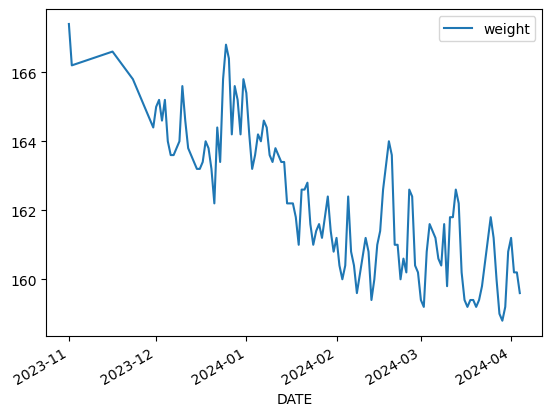

In [43]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

df_weight.plot()

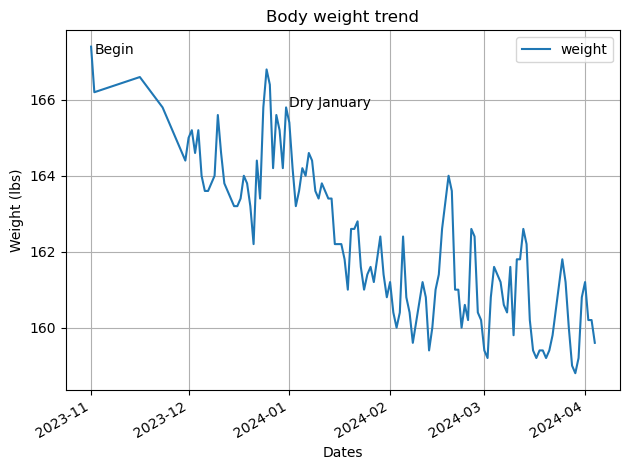

In [48]:
df_weight.plot(kind='line')
plt.title('Body weight trend')
plt.ylabel('Weight (lbs)')
plt.xlabel('Dates')
plt.text("2023-11-02", 167.2, 'Begin')
plt.text("2024-01-01", 165.8, 'Dry January')
plt.tight_layout()
plt.grid()
plt.show()